In [19]:
import numpy as np
from numpy import arange
import random
import matplotlib.pyplot as plt
import pylab as plb
import collections
import pandas as pd
from statistics import mean
from itertools import combinations_with_replacement


# 11.


In [20]:
def rolling_dice(number_of_dices):

    means_dic = dict()
    for i in combinations_with_replacement(range(1, 7), number_of_dices):
        mean__ = round(sum(i)/len(i), 1)
        if mean__ not in means_dic:
            means_dic[mean__] = 0

    for i in range(0, 1000):
        rolling_results = np.random.choice(range(1, 7), number_of_dices)
        avs = round(sum(rolling_results)/len(rolling_results), 1)
        means_dic[avs] += 1

    probabilities = pd.DataFrame()
    for key in means_dic.keys():
        probabilities.loc[key, 'probability'] = means_dic[key]/1000

    probabilities.sort_index(inplace=True)

    display(probabilities)
    return probabilities

,probability
1.0,0.048
1.5,0.041
2.0,0.079
2.5,0.098
3.0,0.151
3.5,0.181
4.0,0.126
4.5,0.119
5.0,0.073
5.5,0.050


,probability
1.0,0.006
1.3,0.011
1.7,0.023
2.0,0.046
2.3,0.069
2.7,0.106
3.0,0.123
3.3,0.120
3.7,0.147
4.0,0.110


,probability
1.0,0.002
1.2,0.002
1.5,0.007
1.8,0.011
2.0,0.023
2.2,0.046
2.5,0.055
2.8,0.067
3.0,0.093
3.2,0.108


,probability
1.0,0.000
1.2,0.000
1.4,0.000
1.6,0.002
1.8,0.015
2.0,0.012
2.2,0.019
2.4,0.032
2.6,0.045
2.8,0.081


Text(0.5, 1.0, '5 dices')

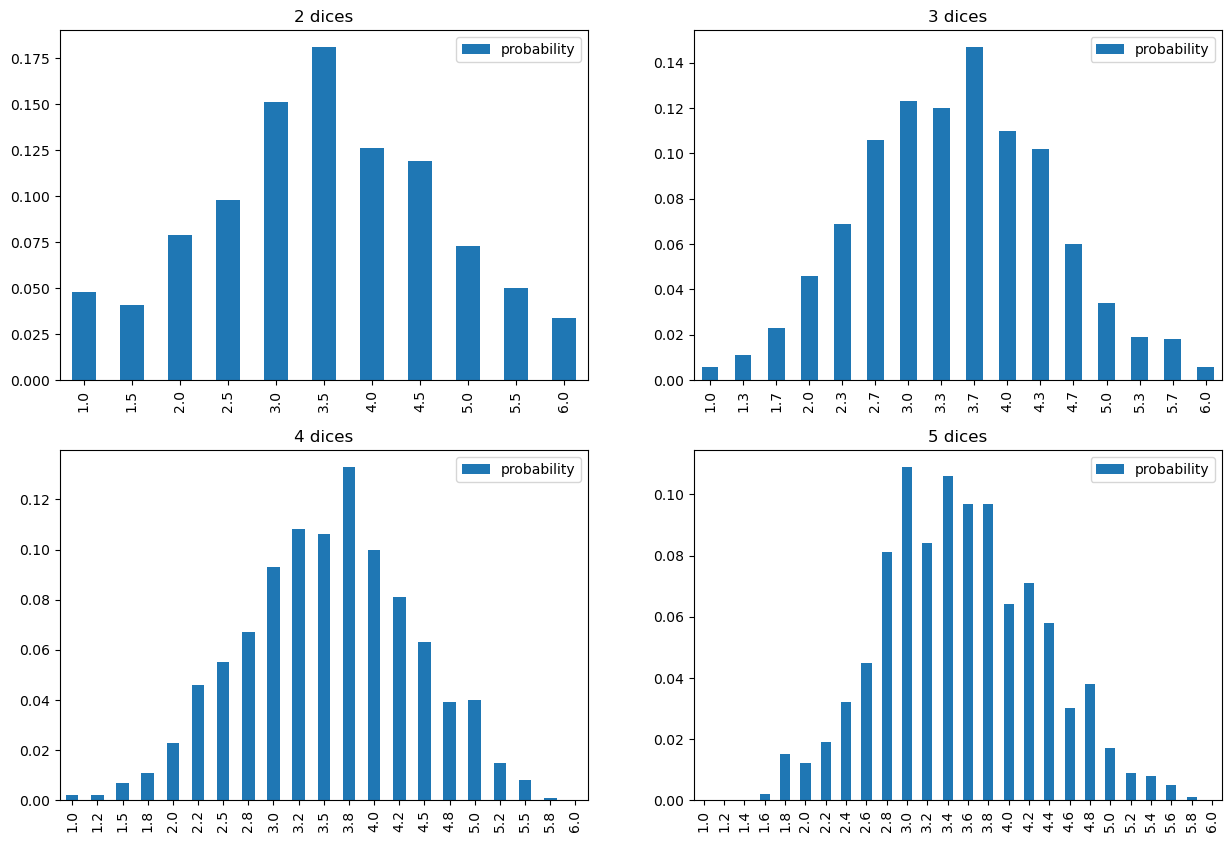

In [21]:
fugure, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

dices_2 = rolling_dice(2)
dices_3 = rolling_dice(3)
dices_4 = rolling_dice(4)
dices_5 = rolling_dice(5)

dices_2.plot.bar(ax=axes[0][0])
axes[0][0].set_title('2 dices')


dices_3.plot.bar(ax=axes[0][1])
axes[0][1].set_title('3 dices')

dices_4.plot.bar(ax=axes[1][0])
axes[1][0].set_title('4 dices')

dices_5.plot.bar(ax=axes[1][1])
axes[1][1].set_title('5 dices')

# 12.


In [22]:
def Kruskal(numbers_of_cards=52, face_card_step=1):
    ends = []
    card_lst = list(arange(1, 14))*(int)(numbers_of_cards/13)
    random.shuffle(card_lst)
    # card_df = pd.DataFrame(card_lst, columns=['cards'])

    for i in range(10):
        # display(card_df)
        step = [np.nan, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                face_card_step, face_card_step, face_card_step]

        start = i+1
        # print('start: ',start)
        while start+card_lst[start-1] <= numbers_of_cards:
            pick = card_lst[start-1]
            start += step[pick]
            # print('start: ',start,'pick: ', pick)

        end = card_lst[start-1]
        ends.append(end)
        # print(ends)

        if len(ends) > 1 and end != ends[-2]:
            return False

    return True


In [23]:
def Kruskal_Count(numbers_of_cards=52, steps_for_face_cards=5):

    equivalent = []
    for i in range(10000):
        equivalent.append(Kruskal(numbers_of_cards, steps_for_face_cards))

    probability = equivalent.count(True)/10000

    return probability

In [24]:
numbers_of_cards = [52, 104]
steps_for_face_cards = [1, 3, 5, 7, 9]
probabilities = pd.DataFrame()

for i in range(len(numbers_of_cards)):
    for j in range(len(steps_for_face_cards)):
        probabilities.loc[str(steps_for_face_cards[j]), str(numbers_of_cards[i])] = Kruskal_Count(
            numbers_of_cards[i], steps_for_face_cards[j])

probabilities

,52,104
1,0.7634,0.9868
3,0.6719,0.9675
5,0.5650,0.9394
7,0.4690,0.8894
9,0.3617,0.8309


Text(0.5, 1.0, 'Kruskal count')

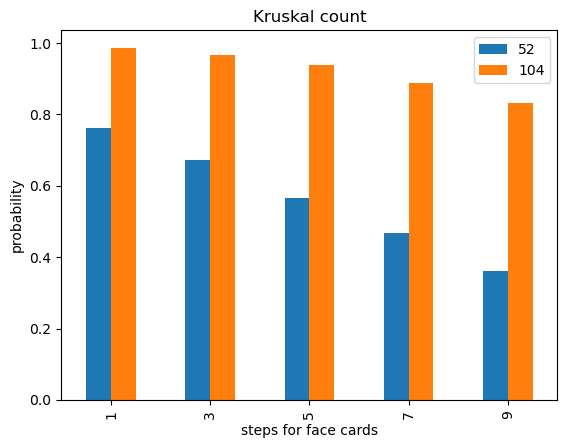

In [25]:
probabilities.plot.bar()
plt.xlabel('steps for face cards')
plt.ylabel('probability')
plt.title('Kruskal count')


# 12. (a)

從上面的圖表以及表格可以得出參數設定(the number of cards, steps for face cards)=(52, 5)時，前十張牌最後到達的牌相同的機率為 0.57，並且模擬過幾次每次的結果不會差的很多，基本上都在 0.5-0.6 之間


# 12.(b)

- 從上面的表格以及圖表可以得出參數設定不同時前十張牌最後到達的牌相同的機率
- 模擬結果可以發現若牌數設為 104，不管 face card 的前進數為何，其前十張牌最後抵達的牌相同的機率皆會大於牌數為 52 的機率
- 前進數設的越大，最後到達同張牌的機率越低
